In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

CRIAÇÃO DO DATASET

In [15]:
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=200)
normal_data

array([52.48357077, 49.30867849, 53.23844269, 57.61514928, 48.82923313,
       48.82931522, 57.89606408, 53.83717365, 47.65262807, 52.71280022,
       47.68291154, 47.67135123, 51.20981136, 40.43359878, 41.37541084,
       47.18856235, 44.9358444 , 51.57123666, 45.45987962, 42.93848149,
       57.32824384, 48.8711185 , 50.33764102, 42.87625907, 47.27808638,
       50.55461295, 44.24503211, 51.87849009, 46.99680655, 48.54153125,
       46.99146694, 59.26139092, 49.93251388, 44.71144536, 54.11272456,
       43.89578175, 51.04431798, 40.20164938, 43.35906976, 50.98430618,
       53.6923329 , 50.85684141, 49.42175859, 48.49448152, 42.60739005,
       46.40077896, 47.69680615, 55.28561113, 51.71809145, 41.18479922,
       51.62041985, 48.0745886 , 46.61539   , 53.05838144, 55.15499761,
       54.6564006 , 45.80391238, 48.45393812, 51.65631716, 54.87772564,
       47.60412881, 49.07170512, 44.46832513, 44.01896688, 54.06262911,
       56.78120014, 49.63994939, 55.01766449, 51.80818013, 46.77

In [16]:
anomalies = np.random.uniform(low=80, high=100, size=10)
anomalies

array([97.54746144, 94.81537236, 93.94031482, 94.04968168, 87.18982302,
       85.87183689, 96.18722311, 96.20226789, 97.34144637, 98.26481105])

In [17]:
data = np.concatenate([normal_data, anomalies])
df = pd.DataFrame(data, columns=['transaction_amount'])

labels = np.concatenate([np.zeros(200), np.ones(10)])
df['label_true'] = labels

df

,transaction_amount,label_true
0,52.483571,0.0
1,49.308678,0.0
2,53.238443,0.0
3,57.615149,0.0
4,48.829233,0.0
...,...,...
205,85.871837,1.0
206,96.187223,1.0
207,96.202268,1.0
208,97.341446,1.0


ANÁLISE EXPLORATÓRIA DOS DADOS

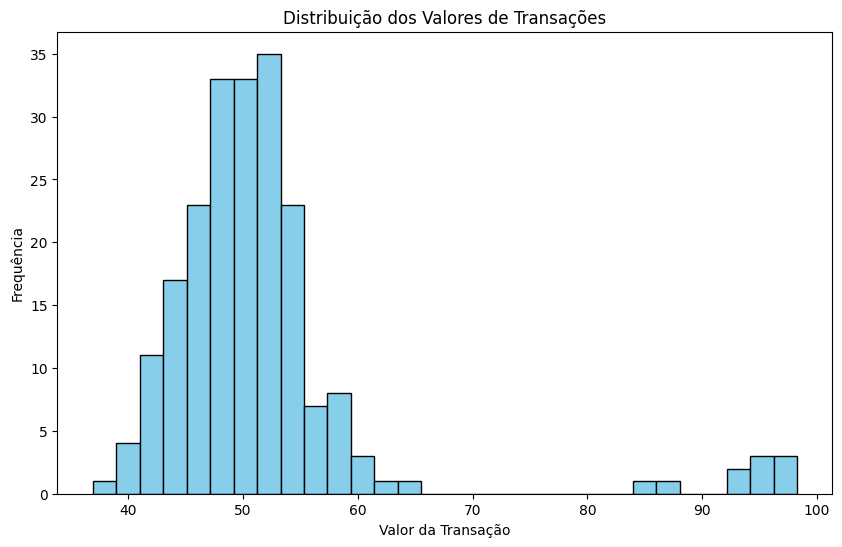

In [18]:
plt.figure(figsize=(10, 6))
plt.title('Distribuição dos Valores de Transações')
plt.hist(df['transaction_amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.show()

HOLD-OUT

In [19]:
X = df[['transaction_amount']]
y = df['label_true']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f'Tamanho do treino: {X_train.shape[0]}')
print(f'Tamanho do teste: {X_test.shape[0]}')

Tamanho do treino: 168
Tamanho do teste: 42


MODELO PREDITIVO

In [67]:
model = IsolationForest(n_estimators=256, contamination=0.025, random_state=42)


In [68]:
model.fit(X_train)

IsolationForest(contamination=0.025, n_estimators=256, random_state=42)

In [69]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)

AVALIAÇÃO E TESTE

In [70]:
cm = confusion_matrix(y_test, y_pred)

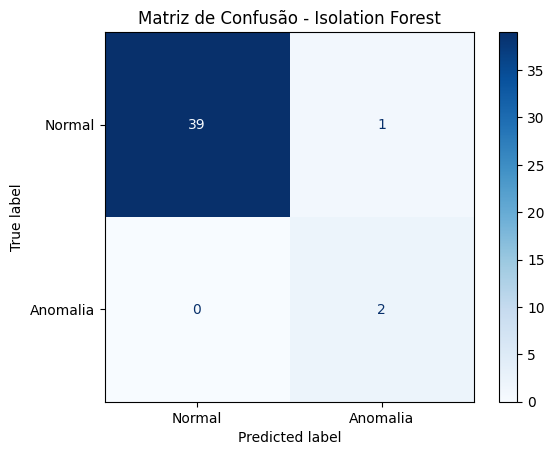

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomalia'])
disp.plot(cmap=plt.cm.Blues) #type: ignore
plt.title('Matriz de Confusão - Isolation Forest')
plt.show()

In [73]:
report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomalia'])
print("Relatório de Métricas:\n")
print(report)

Relatório de Métricas:

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99        40
    Anomalia       0.67      1.00      0.80         2

    accuracy                           0.98        42
   macro avg       0.83      0.99      0.89        42
weighted avg       0.98      0.98      0.98        42



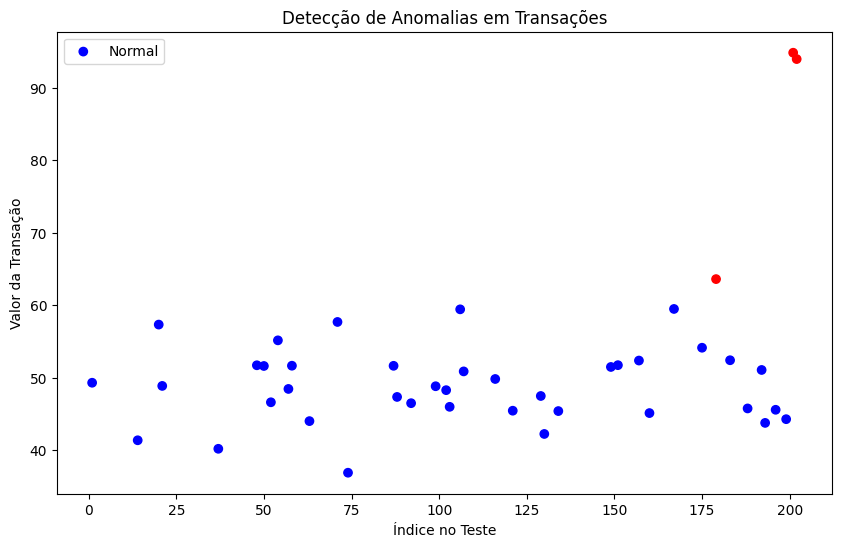

In [74]:
plt.figure(figsize=(10, 6))
plt.title('Detecção de Anomalias em Transações')

colors = {0: 'blue', 1: 'red'}

plt.scatter(
    X_test.index,
    X_test['transaction_amount'],
    c=[colors[label] for label in y_pred],
    label='Transações'
)

plt.xlabel('Índice no Teste')
plt.ylabel('Valor da Transação')
plt.legend(['Normal', 'Anomalia'])
plt.show()